<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries. The dataset contains the summary of the 14 batteries.

Variables:

 - Cycle Index: number of cycle
 - F1: Discharge Time (s)
 - F2: Time at 4.15V (s)
 - F3: Time Constant Current (s)
 - F4: Decrement 3.6-3.4V (s)
 - F5: Max. Voltage Discharge (V)
 - F6: Min. Voltage Charge (V)
 - F7: Charging Time (s)
 - Total time (s)
 - RUL: target

You may check on GitHub how the dataset was built: https://github.com/ignavinuales/Battery_RUL_Prediction

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Explore</b>

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings



In [2]:
# df = pd.read_csv('Battery_RUL.csv')
df = pd.read_csv("Battery_RUL.csv")

First up is just to eyeball the data.


In [3]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
df['Battery ID']= 0
batteries=[]
ID=1
for rul in df['RUL']:
    batteries.append(ID)
    if rul == 0:
        ID+=1
        continue
df['Battery ID'] = batteries

In [5]:
sensor_list = df.columns[1:-2]
sensor_list

Index(['Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
 9   Battery ID                 15064 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.1 MB


In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Cycle_Index,15064.0,556.155005,322.378480,1.000,271.000000,560.000000,833.0000,1134.000
Discharge Time (s),15064.0,4581.273960,33144.012077,8.690,1169.310000,1557.250000,1908.0000,958320.370
Decrement 3.6-3.4V (s),15064.0,1239.784672,15039.589269,-397645.908,319.600000,439.239471,600.0000,406703.768
Max. Voltage Dischar. (V),15064.0,3.908176,0.091003,3.043,3.846000,3.906000,3.9720,4.363
Min. Voltage Charg. (V),15064.0,3.577904,0.123695,3.022,3.488000,3.574000,3.6630,4.379
Time at 4.15V (s),15064.0,3768.336171,9129.552477,-113.584,1828.884179,2930.203500,4088.3265,245101.117
Time constant current (s),15064.0,5461.266970,25155.845202,5.980,2564.310000,3824.260000,5012.3500,880728.100
Charging time (s),15064.0,10066.496204,26415.354121,5.980,7841.922500,8320.415000,8763.2825,880728.100
RUL,15064.0,554.194172,322.434514,0.000,277.000000,551.000000,839.0000,1133.000
Battery ID,15064.0,7.486126,4.023541,1.000,4.000000,7.000000,11.0000,14.000


In [8]:
train_battery_ids = []
test_battery_ids = []
battery_ids = df['Battery ID'].unique()

for i in battery_ids:
    if i<9:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
df_train = df[df['Battery ID'].isin(train_battery_ids)]
df_test = df[df['Battery ID'].isin(test_battery_ids)]

We find the RUL for the components at each cycle

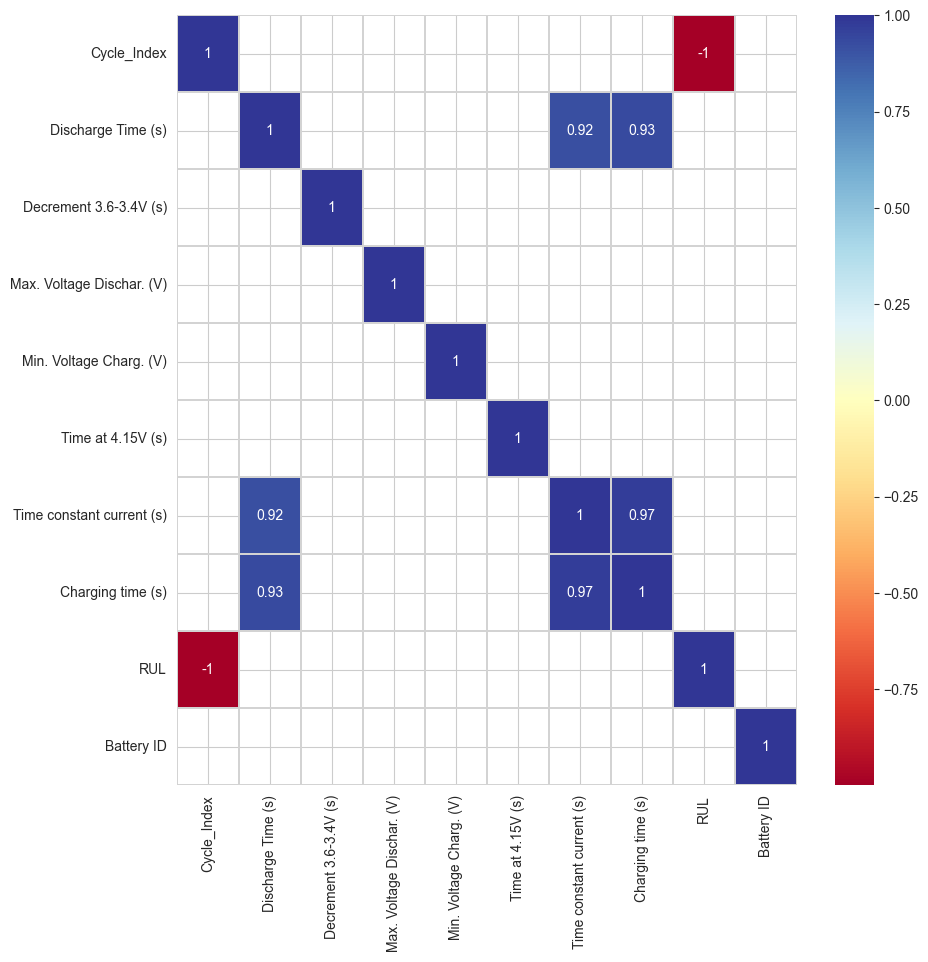

In [9]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

sensors with constant values can be dropped as they have no predictive power

In [10]:
sens_const_values = []
for feature in list(sensor_list):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1317794062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(sens_const_values,axis=1,inplace=True)
C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1317794062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(sens_const_values,axis=1,inplace=True)


Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

In [11]:
# corr_features = ['sensor_9']

cor_matrix = df_train[sensor_list].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['Charging time (s)']


C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1508945548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(corr_features,axis=1,inplace=True)
C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1508945548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(corr_features,axis=1,inplace=True)


The remaining features

In [12]:
list(df_train)

['Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'RUL',
 'Battery ID']

In [13]:
df_train.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,Battery ID
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,1112,1
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,1111,1
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,1110,1
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,1109,1
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,1107,1


In [14]:
features = list(df_train.columns)

In [15]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

Cycle_Index - 0
Discharge Time (s) - 0
Decrement 3.6-3.4V (s) - 0
Max. Voltage Dischar. (V) - 0
Min. Voltage Charg. (V) - 0
Time at 4.15V (s) - 0
Time constant current (s) - 0
RUL - 0
Battery ID - 0


The charts below shows what the data looks like. It is a bit noisy between charging and discharging, but it turns out that this information is important, i.e. you will not get better results by smoothing out the data.

C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1243781343.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


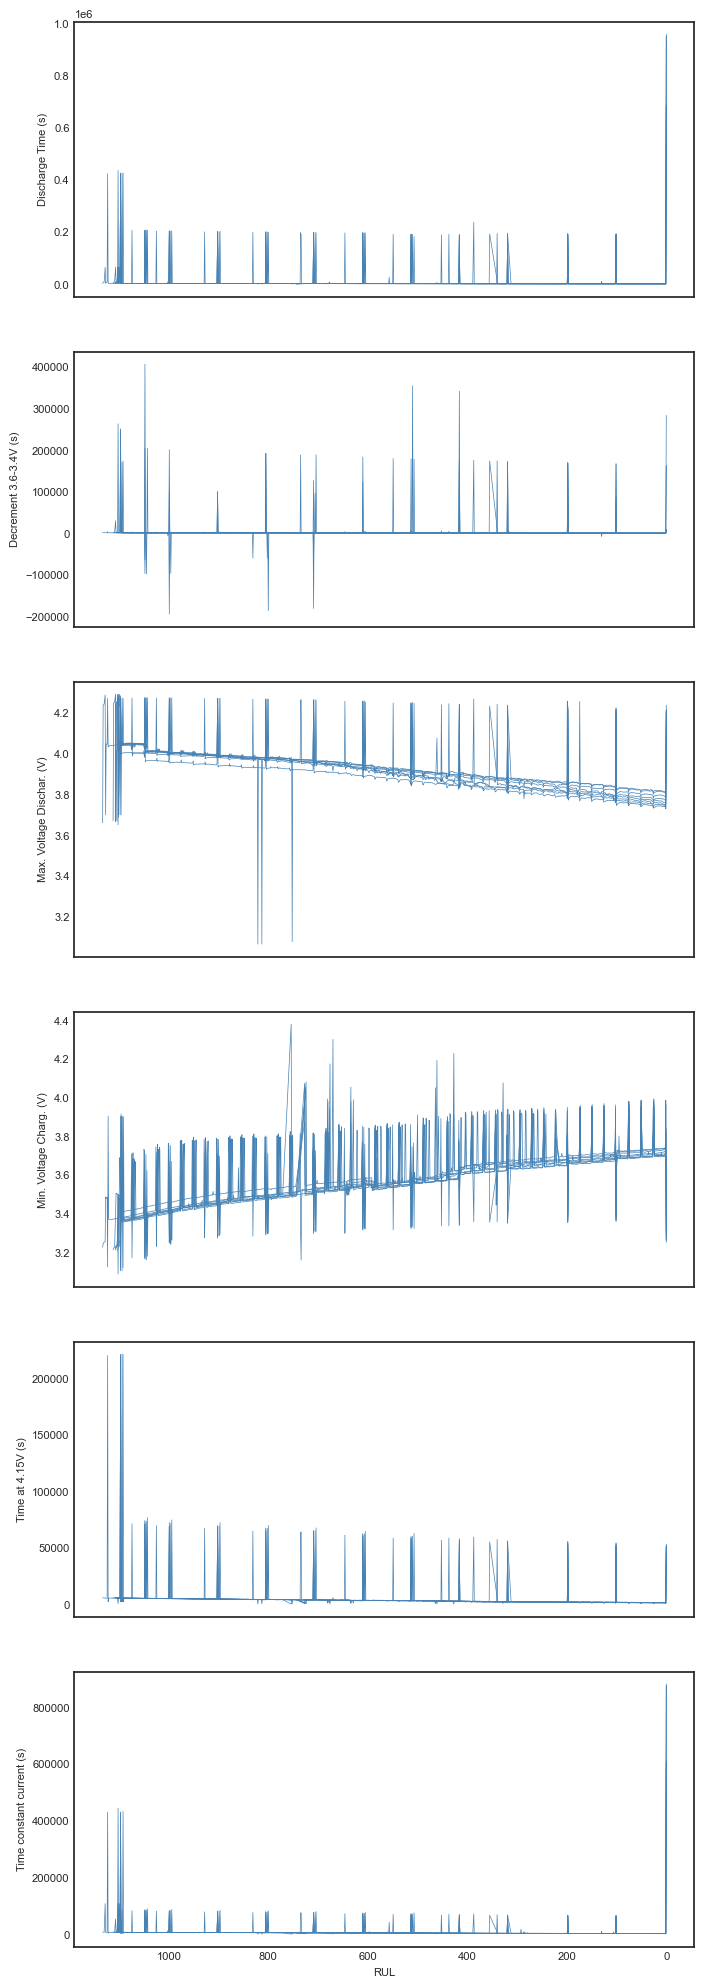

In [16]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,25
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.5
plot_items = list(df_train.columns)[1:-2]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

batteries = list(df_train['Battery ID'].unique())
batteries_test = list(df_test['Battery ID'].unique())

for battery in batteries:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['Battery ID']==battery],x='RUL',y=item,color='steelblue',ax=ax[i],
                        )

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

Perform a statistical univariate test to determine the best features.

In [17]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-2]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : Discharge Time (s), 0.6118354897483405 
worst_feature : Time constant current (s), 0.8328957966233703 
worst_feature : Time at 4.15V (s), 0.511830296587959 
worst_feature : Decrement 3.6-3.4V (s), 0.1897853939951176 

Selected Features:
['Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)']


There are only two features required to predict the RUL. Quite interesting.

In [18]:
feature_names = Selected_Features[0]

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [19]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [20]:
X_train = df_train[feature_names]
y_train = df_train['RUL']

X_test = df_test[feature_names]
y_test = df_test['RUL']


In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
# sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [23]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=100,
                              min_samples_leaf=1,
                              max_features='sqrt',
                              # min_samples_split=2,
                              bootstrap = True,
                              criterion='squared_error',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error: 94.26%
Root Mean Squared Error: 77.16
CPU times: total: 2.52 s
Wall time: 1.1 s


C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1804868518.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1804868518.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)
C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1804868518.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


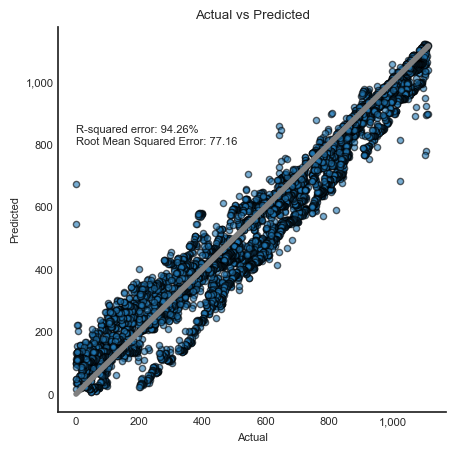

In [24]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

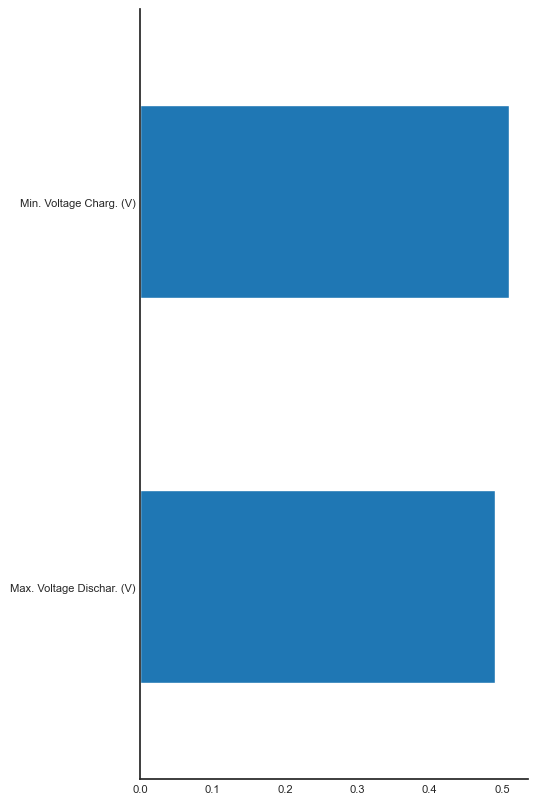

In [25]:
plt.rcParams['figure.figsize']=5,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [26]:
df_test.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,Battery ID
8629,1.0,2565.31,1186.4965,3.664,3.221,5439.007,6740.99,1107,9
8630,2.0,7333.44,1196.9920,4.240,3.227,5480.992,6740.99,1106,9
8631,3.0,7302.50,1133.9840,4.242,3.232,5460.000,6720.00,1105,9
8632,4.0,7300.03,1099.0080,4.244,3.234,5467.004,6720.00,1104,9
8633,6.0,64835.52,1116.4960,4.288,3.239,5467.008,107695.78,1102,9


In [27]:
df_test['RUL predicted'] = y_predictions

C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\3103225973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RUL predicted'] = y_predictions


C:\Users\kadal\AppData\Local\Temp\ipykernel_19408\1280309097.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


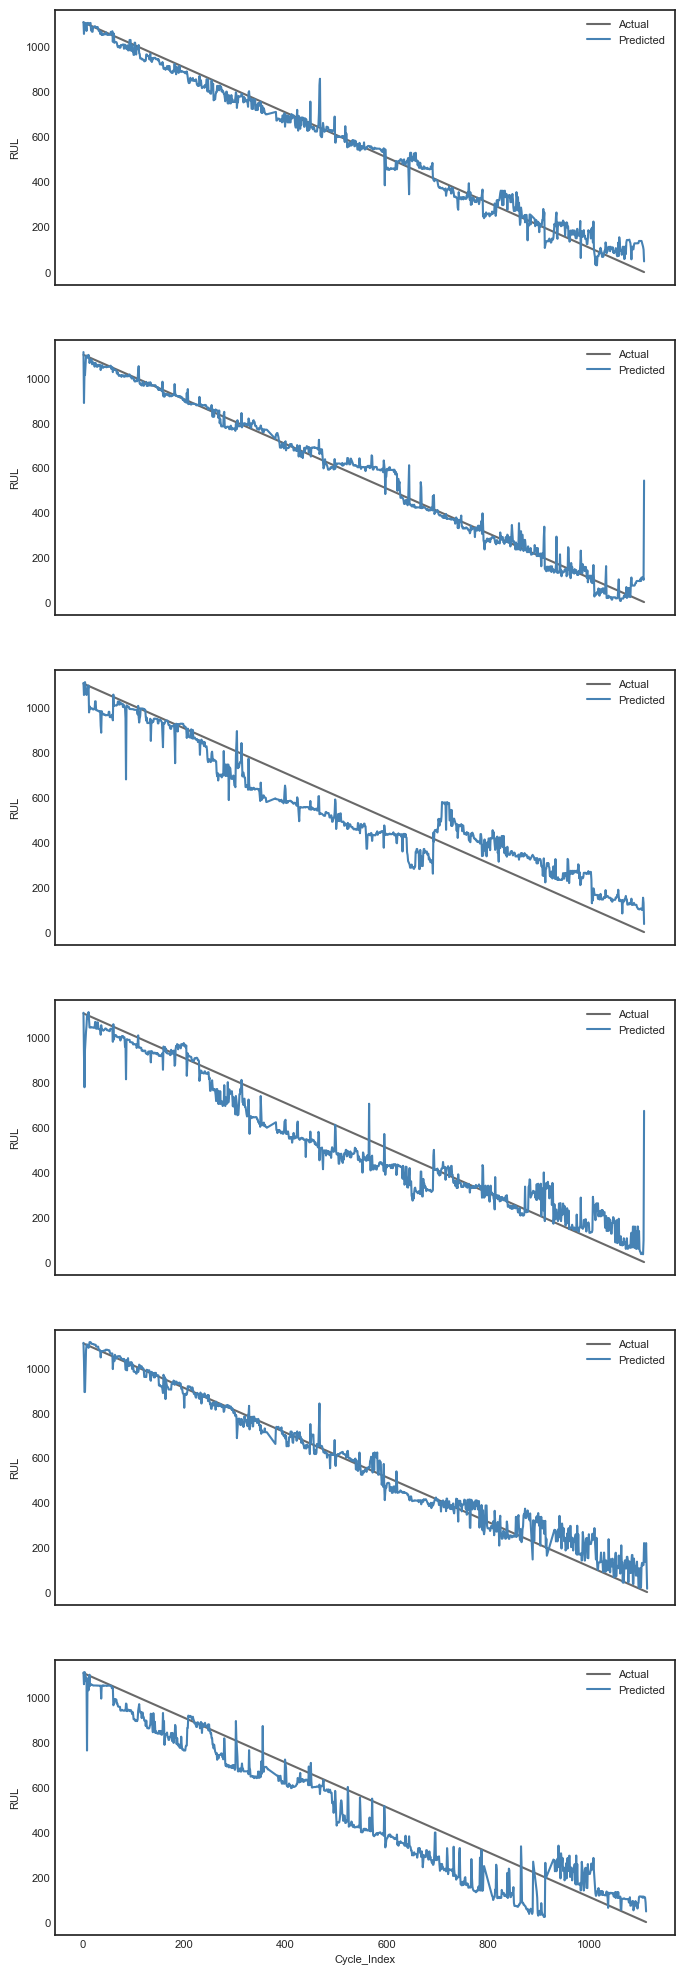

In [28]:
batteries = list(df_train['Battery ID'].unique())
batteries_test = list(df_test['Battery ID'].unique())

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,25
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
fig,ax = plt.subplots(len(batteries_test),sharex=True)

for i, battery in enumerate(batteries_test):
    f = sns.lineplot(data=df_test[df_test['Battery ID']==battery],
                     x='Cycle_Index',
                     y='RUL',
                     color='dimgray',
                     ax=ax[i],
                     label='Actual'
                    )
    g = sns.lineplot(data=df_test[df_test['Battery ID']==battery],
                     x='Cycle_Index',
                     y='RUL predicted',
                     color='steelblue',
                     ax=ax[i],
                     label='Predicted'
                    )
    ax[i].legend = True

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

In [29]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })

,R2,RMSE,time to train,time to predict,total time
Random Forest,94.26%,77.16,0.646,0.042,0.688


<a id='6'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Conclusion</b>

Random Forest does quite well to capture the essense of the RUL prediction throughout the life of the battery.

don't forget to upvote if you found this useful.

In [30]:
print("Done execution")

Done execution


**Explainable AI Methods to provide explainability**

**LIME Model**

In [31]:

from lime.lime_tabular import LimeTabularExplainer
from alibi.explainers import AnchorTabular


c:\Users\kadal\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
print(X.shape)
print(X_train.shape)

(8629, 6)
(8629, 2)


In [33]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [34]:
feature_names = list(X_train_df.columns)
# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train_df.values,  # Use .values to get NumPy array from DataFrame
    feature_names=X_train_df.columns.tolist(),  # List of feature names
    mode='regression'
)

In [35]:
i = np.random.randint(0, X_test_df.shape[0])
exp = explainer.explain_instance(X_test_df.iloc[i].values, model.predict, num_features=10)
exp.show_in_notebook(show_table=True)

**Inference**

For the random data point passed into the model the predicted value of RUL is 643.33. The range of prediction of values was inferred to be between 16.82 and 1107.76 cycles. The feature 0 bearing a value of 0.71 has a positive impact of 144.35 on the result predicted. Feature 1 on the other hand has a negative impact of 119.18. The increase of contribution of this feature lowers the predicted RUL.In the given instance a value of 0.61 to this feature lowers the number of cycles by 119.18. The index of the feature is determined by its position in the dataframe. The feature 1 could possibly be discharge Time and feature 0 could be cycle time as this inference is supported by the heatmap drawn earlier with values 0.92 and -1 respectively

**ICE PLOTS**

In [36]:
from sklearn.inspection import PartialDependenceDisplay

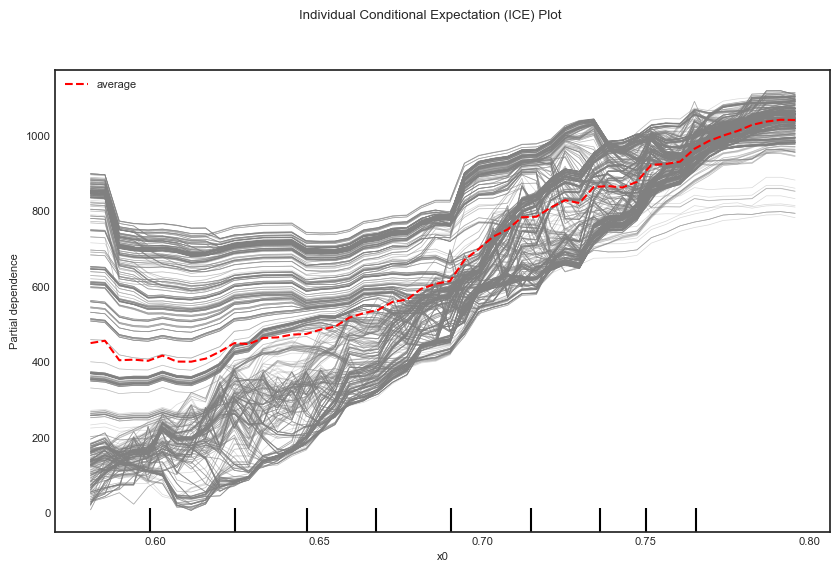

In [37]:
feature_index = 0  # Index of the feature you want to analyze (e.g., the first feature)

# Create ICE plot
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(
    model, X_train, [feature_index], kind='both',  # 'both' for PDP and ICE, or 'individual' for ICE only
    grid_resolution=50, ax=ax, ice_lines_kw={'alpha': 0.3, 'color': 'gray'},
    pd_line_kw={'color': 'red'}
)
plt.suptitle('Individual Conditional Expectation (ICE) Plot')
plt.show()

**Inference from the plot**

The grey lines captures the change in prediction of a single data instance as the value of the specific feature is varied keeping other features constant. The upward movement of lines indicates that the feature has a positive correlation on the target variable. At lower levels the variance between the data points is high indicating that the impact of the specific feature keeps changing for different data points. The red line indicates the average effect of the feature on the RUL. As this is not a straight line it indicates a non linear dependence between the feature and the target variable

**SHAP**

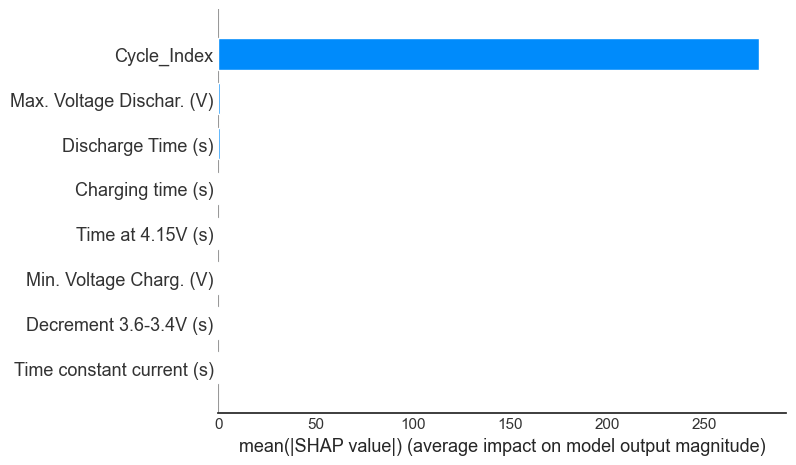

InvalidIndexError: (0, slice(None, None, None))

In [43]:
import shap

# Assuming 'model' is your trained Random Forest model
# and 'X_test' is your test feature set

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")
plt.show()

# Create a SHAP force plot for a single prediction (e.g., the first test instance)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=feature_names)
plt.show()

# Create a SHAP dependence plot for a specific feature (e.g., the most important feature)
most_important_feature = feature_names[model.feature_importances_.argmax()]
shap.dependence_plot(most_important_feature, shap_values, X_test, feature_names=feature_names)
plt.show()

# Generate a SHAP waterfall plot for a single prediction
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test[0], feature_names=feature_names))
plt.show()

This code improves the explainability of the Random Forest model in several key ways:

1. Feature Importance: It provides a more nuanced view of feature importance than the built-in feature importance of Random Forests. SHAP values show not just which features are important, but how they impact predictions positively or negatively.

2. Individual Predictions: It allows you to explain individual predictions, showing how each feature contributed to a specific outcome. This is crucial for understanding why the model made a particular decision.

3. Feature Interactions: SHAP can reveal how features interact with each other, which is not easily discernible from traditional feature importance measures.

4. Global and Local Explanations: It provides both global explanations (overall feature importance) and local explanations (for individual predictions).

In essence, this code does the following:

1. Calculates SHAP values: These represent the impact each feature has on the model output for each instance in the dataset.

2. Generates Visualizations:
   - Summary Plot: Shows the overall impact and importance of each feature across all predictions.
   - Force Plot: Visualizes how each feature pushes the prediction higher or lower for a single instance.
   - Dependence Plot: Shows how the model output changes as a single feature changes, accounting for feature interactions.
   - Waterfall Plot: Breaks down a single prediction, showing how each feature moves the prediction from the base value to the final prediction.

3. Interprets Model Behavior: By analyzing these visualizations, you can understand:
   - Which features are driving the predictions
   - How different feature values affect predictions
   - Where feature interactions are important
   - Why the model made specific predictions for individual cases

This approach turns the "black box" of a Random Forest model into a more transparent system, allowing stakeholders to understand and trust the model's decision-making process. It's particularly valuable in domains where interpretability is crucial, such as healthcare, finance, or any field where decisions need to be explained and justified.

**DICE ML**

Shape of instance to explain: (1, 8)


100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

Query instance (original outcome : 1043.0)


,Cycle_Index,Discharge_Time_s,Decrement_36_34V_s,Max_Voltage_Dischar_V,Min_Voltage_Charg_V,Time_at_415V_s,Time_constant_current_s,Charging_time_s,RUL
0,65.0,2174.719971,805.0,4.005,3.396,4982.319824,5948.319824,9212.379883,1043.0



Diverse Counterfactual set (new outcome: [1093, 1143])


,Cycle_Index,Discharge_Time_s,Decrement_36_34V_s,Max_Voltage_Dischar_V,Min_Voltage_Charg_V,Time_at_415V_s,Time_constant_current_s,Charging_time_s,RUL
0,5.9,2174.72,805.0,4.005,3.396,4982.32,426629.78,9212.38,1099.959961
1,17.8,837753.10,805.0,4.005,3.396,4982.32,5948.32,9212.38,1096.099976
2,14.7,2174.72,805.0,4.005,3.396,4982.32,5948.32,9212.38,1096.569946


   Cycle_Index  Discharge_Time_s  Decrement_36_34V_s  Max_Voltage_Dischar_V  \
0          5.9           2174.72               805.0                  4.005   
1         17.8         837753.10               805.0                  4.005   
2         14.7           2174.72               805.0                  4.005   

   Min_Voltage_Charg_V  Time_at_415V_s  Time_constant_current_s  \
0                3.396         4982.32                426629.78   
1                3.396         4982.32                  5948.32   
2                3.396         4982.32                  5948.32   

   Charging_time_s     RUL  
0          9212.38  1100.0  
1          9212.38  1096.0  
2          9212.38  1097.0  
Query instance (original outcome : 1043.0)
[65.0, 2174.719970703125, 805.0, 4.005000114440918, 3.3959999084472656, 4982.31982421875, 5948.31982421875, 9212.3798828125, 1043.0]

Diverse Counterfactual set (new outcome: [1093, 1143])
[5.9, 2174.72, 805.0, 4.005, 3.396, 4982.320000000065, 426629.78, 

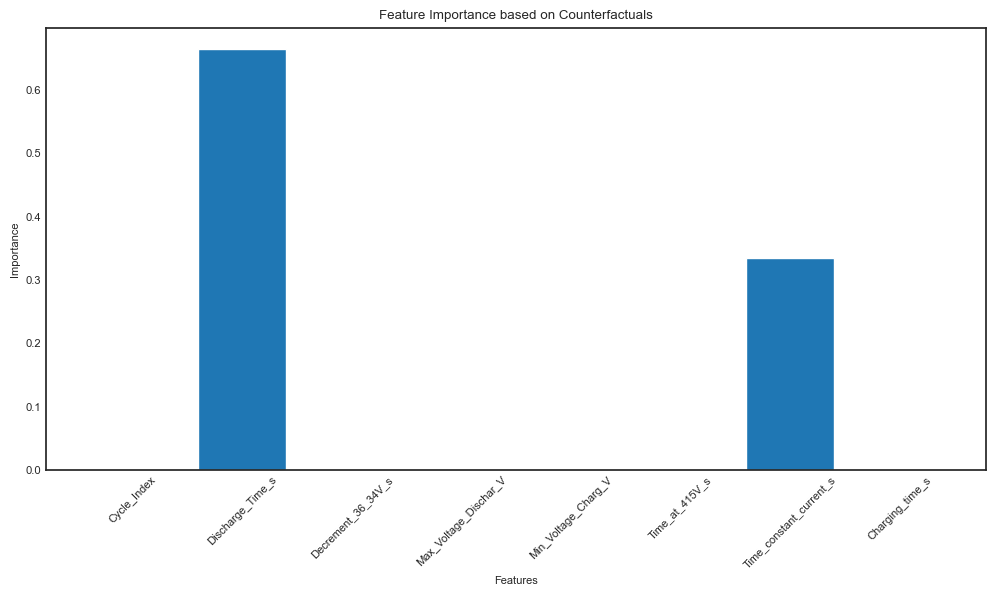

In [40]:
import dice_ml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('./Battery_RUL.csv')

# Define feature names
feature_names = [
    'Cycle_Index',
    'Discharge Time (s)',
    'Decrement 3.6-3.4V (s)',
    'Max. Voltage Dischar. (V)',
    'Min. Voltage Charg. (V)',
    'Time at 4.15V (s)',
    'Time constant current (s)',
    'Charging time (s)'
]

# Sanitize the column names
sanitized_feature_names = [col.replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_') for col in feature_names]
df.columns = [col.replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_') for col in df.columns]

# Split the data into features (X) and target (y)
X = df[sanitized_feature_names]
y = df['RUL']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create the DiCE data object
full_data = pd.concat([X_train, y_train.rename('RUL')], axis=1)
data = dice_ml.Data(dataframe=full_data, 
                    continuous_features=sanitized_feature_names,
                    outcome_name='RUL')

# Create the DiCE model object, explicitly specifying it's a regression model
dice_model = dice_ml.Model(model=model, backend="sklearn", model_type='regressor')

# Create the DiCE explainer object
exp = dice_ml.Dice(data, dice_model)

# Generate counterfactual explanations for a specific instance
instance_to_explain = X_test.iloc[[0]]  # Use .iloc to select the first row as a DataFrame
print("Shape of instance to explain:", instance_to_explain.shape)

# Generate diverse counterfactual explanations
counterfactuals = exp.generate_counterfactuals(instance_to_explain, 
                                               total_CFs=3, 
                                               desired_range=[y_test.iloc[0] + 50, y_test.iloc[0] + 100])

# Visualize the counterfactuals
counterfactuals.visualize_as_dataframe()

# Print the counterfactuals
print(counterfactuals.cf_examples_list[0].final_cfs_df)

# Visualize the counterfactuals as a plot
counterfactuals.visualize_as_list()

# Analyze feature importance based on counterfactuals
def analyze_feature_importance(counterfactuals, original_instance):
    feature_changes = {}
    for feature in original_instance.columns:
        changes = []
        for cf in counterfactuals.cf_examples_list[0].final_cfs_df.itertuples():
            cf_dict = cf._asdict()
            sanitized_feature = feature.replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_')
            change = abs(cf_dict[sanitized_feature] - original_instance[feature].values[0])
            changes.append(change)
        feature_changes[feature] = np.mean(changes)
    
    # Normalize the changes
    total_change = sum(feature_changes.values())
    for feature in feature_changes:
        feature_changes[feature] /= total_change
    
    return feature_changes

feature_importance = analyze_feature_importance(counterfactuals, instance_to_explain)
print("Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.keys(), feature_importance.values())
plt.title('Feature Importance based on Counterfactuals')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import dice_ml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

# Load the data
df = pd.read_csv('./Battery_RUL.csv')

# Define feature names
feature_names = [
    'Cycle_Index',
    'Discharge Time (s)',
    'Decrement 3.6-3.4V (s)',
    'Max. Voltage Dischar. (V)',
    'Min. Voltage Charg. (V)',
    'Time at 4.15V (s)',
    'Time constant current (s)',
    'Charging time (s)'
]

# Sanitize the column names
sanitized_feature_names = [col.replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_') for col in feature_names]
df.columns = [col.replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_') for col in df.columns]

# Split the data into features (X) and target (y)
X = df[sanitized_feature_names]
y = df['RUL']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define a custom prediction function
def custom_predict(features):
    features_df = pd.DataFrame(features, columns=sanitized_feature_names)
    predictions = model.predict(features_df)
    return predictions.tolist()

# Combine your test features and labels into a DataFrame
test_data = X_test.copy()
test_data['RUL'] = y_test.values

# Configure the What-If Tool
config_builder = WitConfigBuilder(test_data.to_numpy().tolist(), sanitized_feature_names)
config_builder = config_builder.set_custom_predict_fn(custom_predict)
config_builder = config_builder.set_target_feature('RUL')
wit = WitWidget(config_builder)

# Display the What-If Tool
wit


WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'feature_names': ['Cycle_Index', 'Dischar…